In [1]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


# Parte 1 - Pré-processamento dos Dados

# REDES NEURAIS ARTIFICIAIS

[Aula 3 de Deep Learning](http://bit.ly/dn-unb03) da Engenharia de Software da UnB

### Importar as libs

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
tf.__version__

'2.4.1'

### Importar o dataset

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
print("X >>\n",X)
print("y >>\n",y)

X >>
 [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
y >>
 [1 0 1 ... 1 1 0]


### Transformando os dados categóricos


In [6]:
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]
[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


# Dividindo o dataset em conjunto de treinamento e conjunto de teste

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
np.shape(X_train)

(8000, 12)

---
# Parte 2 -Vamos construir uma ANN!


### Initializing the ANN

In [10]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [11]:
ann.add(tf.keras.layers.Dense(units=8, activation='elu', kernel_initializer='random_normal'))

### Adding the second hidden layer

In [12]:
ann.add(tf.keras.layers.Dense(units=8, activation='selu'))

### Adding the output layer

In [13]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [14]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [15]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5716 - accuracy: 0.7182
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.8127
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4161 - accuracy: 0.8150: 0s - loss: 0.4242 - accura
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8264
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8193
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3860 - accuracy: 0.8353
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8348
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3714 - accuracy: 0.8443
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8559
Epoch 10/100
250/250 [==============================] - 0s 1ms/

250/250 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8577
Epoch 81/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8636
Epoch 82/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8635
Epoch 83/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3293 - accuracy: 0.8649
Epoch 84/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3310 - accuracy: 0.8640
Epoch 85/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3247 - accuracy: 0.8612
Epoch 86/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3297 - accuracy: 0.8671
Epoch 87/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8621
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8641
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 

# Parte 3 - Fazendo predições e avaliando o modelo

## Prevendo os resultados com o conjunto de testes

In [16]:
y_pred = ann.predict(X_test)
y_pred

array([[0.23311049],
       [0.16338065],
       [0.14717227],
       ...,
       [0.19646564],
       [0.11081564],
       [0.20008379]], dtype=float32)

In [17]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# Criando uma Confusion Matrix

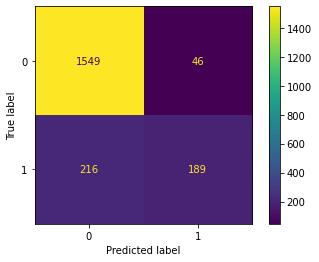

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [19]:
correct_pred = cm[0][0] + cm[1][1]
correct_percent = (correct_pred * 100)  / cm.sum()
print(f'Porcentagem de acerto= {correct_percent} %')

Porcentagem de acerto= 86.9 %


# Part 4 - Evaluating, Improving and Tuning the ANN

## 4.1 Evaluating ANN

In [20]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

In [21]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'elu', input_dim = 12))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'selu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [22]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)

In [23]:
mean = accuracies.mean()
variance = accuracies.std()

## 4.2 Improving the ANN

In [24]:
from keras.layers import Dropout

In [25]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'elu', input_dim = 12))
    classifier.add(Dropout(rate = 0.25))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'selu'))
    classifier.add(Dropout(rate = 0.25))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [26]:

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)



In [27]:
mean = accuracies.mean()
variance = accuracies.std()

## 4.3 Tuning ANN

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [29]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'elu', input_dim = 12))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'selu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [30]:
classifier = KerasClassifier(build_fn = build_classifier)

parameters = {'batch_size': [10, 25, 32],
              'epochs': [50, 25],
              'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = classifier,
                           scoring = 'accuracy',
                           param_grid = parameters,
                           cv = 10)



In [31]:
grid_search = grid_search.fit(X_train, y_train)


Epoch 1/50
720/720 [==============================] - 1s 1ms/step - loss: 0.5441 - accuracy: 0.8053
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4327 - accuracy: 0.8112
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4352 - accuracy: 0.8119
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4241 - accuracy: 0.8177
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4283 - accuracy: 0.8100
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4162 - accuracy: 0.8189
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4127 - accuracy: 0.8213
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3981 - accuracy: 0.8290
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3894 - accuracy: 0.8253
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3835 - accuracy: 0.8393

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5453 - accuracy: 0.7976
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4394 - accuracy: 0.8012
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4194 - accuracy: 0.8172
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4284 - accuracy: 0.8072
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4261 - accuracy: 0.8164
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4095 - accuracy: 0.8227
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4294 - accuracy: 0.8211
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4351 - accuracy: 0.8143
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4046 - accuracy: 0.8292
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4049 - accuracy: 0.8310
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
720/720 [==============================] - 1s 1ms/step - loss: 0.5477 - accuracy: 0.8033
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4336 - accuracy: 0.8101
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4334 - accuracy: 0.8099
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4236 - accuracy: 0.8143
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4207 - accuracy: 0.8167
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4136 - accuracy: 0.8253
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4067 - accuracy: 0.8232
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3950 - accuracy: 0.8329
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4006 - accuracy: 0.8292
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3972 - accuracy: 0.8334

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5435 - accuracy: 0.8050
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4262 - accuracy: 0.8135
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4301 - accuracy: 0.8118
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4205 - accuracy: 0.8183
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4216 - accuracy: 0.8198
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4066 - accuracy: 0.8212
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4094 - accuracy: 0.8258
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3958 - accuracy: 0.8354
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3828 - accuracy: 0.8321
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3830 - accuracy: 0.8401
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5463 - accuracy: 0.7973
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4395 - accuracy: 0.8053
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4347 - accuracy: 0.8100
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4257 - accuracy: 0.8150
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4208 - accuracy: 0.8184
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4245 - accuracy: 0.8232
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4162 - accuracy: 0.8245
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3975 - accuracy: 0.8331
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4122 - accuracy: 0.8256
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3959 - accuracy: 0.8333
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5467 - accuracy: 0.7986
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4334 - accuracy: 0.8080
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4273 - accuracy: 0.8161
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4165 - accuracy: 0.8162
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4274 - accuracy: 0.8168
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4295 - accuracy: 0.8136
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4141 - accuracy: 0.8294
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4016 - accuracy: 0.8348
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3965 - accuracy: 0.8344
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3901 - accuracy: 0.8421
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5474 - accuracy: 0.8047
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4345 - accuracy: 0.8071
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4250 - accuracy: 0.8166
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4243 - accuracy: 0.8152
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4343 - accuracy: 0.8101
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4052 - accuracy: 0.8237
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3987 - accuracy: 0.8292
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3793 - accuracy: 0.8386
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3825 - accuracy: 0.8419
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3686 - accuracy: 0.8440
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5457 - accuracy: 0.7958
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4227 - accuracy: 0.8194
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4244 - accuracy: 0.8181
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4180 - accuracy: 0.8200
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4190 - accuracy: 0.8206
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4253 - accuracy: 0.8125
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4020 - accuracy: 0.8269
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4032 - accuracy: 0.8292
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4146 - accuracy: 0.8187
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3858 - accuracy: 0.8375
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5441 - accuracy: 0.7884
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4341 - accuracy: 0.8105
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4282 - accuracy: 0.8147
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4205 - accuracy: 0.8141
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4113 - accuracy: 0.8260
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4225 - accuracy: 0.8154
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3940 - accuracy: 0.8346
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3913 - accuracy: 0.8346
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3845 - accuracy: 0.8358
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3886 - accuracy: 0.8351
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5477 - accuracy: 0.7991
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4284 - accuracy: 0.8196
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4319 - accuracy: 0.8094
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4286 - accuracy: 0.8147
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4237 - accuracy: 0.8131
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4261 - accuracy: 0.8147
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4157 - accuracy: 0.8248
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4092 - accuracy: 0.8297
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4085 - accuracy: 0.8318
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3878 - accuracy: 0.8369: 0s - loss

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5523 - accuracy: 0.7948
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4473 - accuracy: 0.8029
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4315 - accuracy: 0.8148
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4266 - accuracy: 0.8160
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4301 - accuracy: 0.8126
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4340 - accuracy: 0.8050: 0s - loss: 0.4359 - accuracy: 
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4194 - accuracy: 0.8192
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4170 - accuracy: 0.8223
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3985 - accuracy: 0.8331
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.39

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5473 - accuracy: 0.7997
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4270 - accuracy: 0.8136
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4233 - accuracy: 0.8176
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4288 - accuracy: 0.8083
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4189 - accuracy: 0.8256: 0s - loss: 0.4179 - accuracy
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4313 - accuracy: 0.8144
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4145 - accuracy: 0.8297
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4203 - accuracy: 0.8196
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4071 - accuracy: 0.8270
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4149

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.8007
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4337 - accuracy: 0.8088
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4277 - accuracy: 0.8135
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4340 - accuracy: 0.8099
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4232 - accuracy: 0.8196
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4184 - accuracy: 0.8168
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4100 - accuracy: 0.8226
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4091 - accuracy: 0.8273
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3777 - accuracy: 0.8392
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3911 - accuracy: 0.8357
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5445 - accuracy: 0.8019
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4240 - accuracy: 0.8143
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4309 - accuracy: 0.8094
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4230 - accuracy: 0.8182
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4235 - accuracy: 0.8161
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4344 - accuracy: 0.8102
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4199 - accuracy: 0.8209
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4215 - accuracy: 0.8159
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4044 - accuracy: 0.8259
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3890 - accuracy: 0.8368
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5575 - accuracy: 0.7952
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4337 - accuracy: 0.8137
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4375 - accuracy: 0.8071
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4352 - accuracy: 0.8082
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4398 - accuracy: 0.8047
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4375 - accuracy: 0.8044
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4221 - accuracy: 0.8165
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4141 - accuracy: 0.8253
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4042 - accuracy: 0.8354: 0s - loss: 0.4033 - accuracy
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4063

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5560 - accuracy: 0.7818: 0s - loss: 0.6074 - 
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4354 - accuracy: 0.8096
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4420 - accuracy: 0.8032
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4313 - accuracy: 0.8101
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4172 - accuracy: 0.8222
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4255 - accuracy: 0.8137
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4137 - accuracy: 0.8251
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4213 - accuracy: 0.8145
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4132 - accuracy: 0.8200
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4016 - accur

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5520 - accuracy: 0.7953
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4419 - accuracy: 0.8071
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4324 - accuracy: 0.8116
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4323 - accuracy: 0.8093
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4393 - accuracy: 0.8069
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4231 - accuracy: 0.8181
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4183 - accuracy: 0.8172
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4027 - accuracy: 0.8259
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4065 - accuracy: 0.8285
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3946 - accuracy: 0.8299
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5447 - accuracy: 0.8078
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4325 - accuracy: 0.8091
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4335 - accuracy: 0.8101
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4244 - accuracy: 0.8186
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4171 - accuracy: 0.8165
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4225 - accuracy: 0.8171
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4287 - accuracy: 0.8185
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4020 - accuracy: 0.8284
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4029 - accuracy: 0.8316
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3977 - accuracy: 0.8385
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5535 - accuracy: 0.7952: 0s - loss: 0.5546 - accuracy: 0.79
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4414 - accuracy: 0.8117
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4296 - accuracy: 0.8122
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4238 - accuracy: 0.8191
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4192 - accuracy: 0.8191
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4169 - accuracy: 0.8207
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4057 - accuracy: 0.8235
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3983 - accuracy: 0.8358
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4045 - accuracy: 0.8305
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7951
Epoch 2/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4338 - accuracy: 0.8156
Epoch 3/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4273 - accuracy: 0.8129
Epoch 4/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4251 - accuracy: 0.8133
Epoch 5/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4327 - accuracy: 0.8127
Epoch 6/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4006 - accuracy: 0.8337
Epoch 7/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4174 - accuracy: 0.8222
Epoch 8/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4174 - accuracy: 0.8186
Epoch 9/50
720/720 [==============================] - 1s 1ms/step - loss: 0.4268 - accuracy: 0.8117
Epoch 10/50
720/720 [==============================] - 1s 1ms/step - loss: 0.3948 - accuracy: 0.8352
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5399 - accuracy: 0.8020
Epoch 2/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4320 - accuracy: 0.8077
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4410 - accuracy: 0.8072
Epoch 4/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4389 - accuracy: 0.8088
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4199 - accuracy: 0.8193
Epoch 6/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4271 - accuracy: 0.8188
Epoch 7/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4237 - accuracy: 0.8259
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4176 - accuracy: 0.8249
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4058 - accuracy: 0.8324
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4143 - accuracy: 0.8220
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5435 - accuracy: 0.7976
Epoch 2/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4478 - accuracy: 0.7976
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4210 - accuracy: 0.8161
Epoch 4/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4352 - accuracy: 0.8062
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4242 - accuracy: 0.8186
Epoch 6/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3972 - accuracy: 0.8325
Epoch 7/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4096 - accuracy: 0.8205
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3957 - accuracy: 0.8362
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3812 - accuracy: 0.8457
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3902 - accuracy: 0.8355
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5507 - accuracy: 0.7993
Epoch 2/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4372 - accuracy: 0.8018
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4389 - accuracy: 0.8065
Epoch 4/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4373 - accuracy: 0.8118
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4377 - accuracy: 0.8077
Epoch 6/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4268 - accuracy: 0.8163
Epoch 7/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4094 - accuracy: 0.8263
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4087 - accuracy: 0.8290
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4087 - accuracy: 0.8266
Epoch 10/25
720/720 [==============================] - 1s 2ms/step - loss: 0.3958 - accuracy: 0.8338
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/25
720/720 [==============================] - 2s 2ms/step - loss: 0.5439 - accuracy: 0.7975
Epoch 2/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4300 - accuracy: 0.8163
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4176 - accuracy: 0.8225
Epoch 4/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4366 - accuracy: 0.8084
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4314 - accuracy: 0.8093
Epoch 6/25
720/720 [==============================] - 1s 2ms/step - loss: 0.4288 - accuracy: 0.8147
Epoch 7/25
720/720 [==============================] - 1s 2ms/step - loss: 0.4218 - accuracy: 0.8194
Epoch 8/25
720/720 [==============================] - 1s 2ms/step - loss: 0.4011 - accuracy: 0.8309
Epoch 9/25
720/720 [==============================] - 1s 2ms/step - loss: 0.3890 - accuracy: 0.8391
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3900 - accuracy: 0.8371

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/25
720/720 [==============================] - 2s 2ms/step - loss: 0.5388 - accuracy: 0.7967
Epoch 2/25
720/720 [==============================] - 1s 2ms/step - loss: 0.4371 - accuracy: 0.8108
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4343 - accuracy: 0.8083
Epoch 4/25
720/720 [==============================] - 1s 2ms/step - loss: 0.4365 - accuracy: 0.8074
Epoch 5/25
720/720 [==============================] - 1s 2ms/step - loss: 0.4162 - accuracy: 0.8182
Epoch 6/25
720/720 [==============================] - 1s 2ms/step - loss: 0.4235 - accuracy: 0.8168
Epoch 7/25
720/720 [==============================] - 1s 2ms/step - loss: 0.4022 - accuracy: 0.8290
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4028 - accuracy: 0.8261
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3799 - accuracy: 0.8436
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3821 - accuracy: 0.8432

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/25
720/720 [==============================] - 2s 2ms/step - loss: 0.5465 - accuracy: 0.7968
Epoch 2/25
720/720 [==============================] - 1s 2ms/step - loss: 0.4355 - accuracy: 0.7998
Epoch 3/25
720/720 [==============================] - 1s 2ms/step - loss: 0.4226 - accuracy: 0.8138
Epoch 4/25
720/720 [==============================] - 1s 2ms/step - loss: 0.4225 - accuracy: 0.8134
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4008 - accuracy: 0.8285
Epoch 6/25
720/720 [==============================] - 1s 2ms/step - loss: 0.4194 - accuracy: 0.8208
Epoch 7/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3949 - accuracy: 0.8364
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3838 - accuracy: 0.8386
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3890 - accuracy: 0.8298
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3905 - accuracy: 0.8331

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5431 - accuracy: 0.7968
Epoch 2/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4304 - accuracy: 0.8118
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4336 - accuracy: 0.8149
Epoch 4/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4242 - accuracy: 0.8176
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4236 - accuracy: 0.8143
Epoch 6/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4081 - accuracy: 0.8214
Epoch 7/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4078 - accuracy: 0.8227: 0s - loss: 0.4078 - accuracy: 0.82
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4041 - accuracy: 0.8264
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3941 - accuracy: 0.8282
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5444 - accuracy: 0.7971
Epoch 2/25
720/720 [==============================] - 1s 2ms/step - loss: 0.4359 - accuracy: 0.8098
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4306 - accuracy: 0.8116
Epoch 4/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4204 - accuracy: 0.8146
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4202 - accuracy: 0.8186
Epoch 6/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4079 - accuracy: 0.8255
Epoch 7/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4092 - accuracy: 0.8206
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4009 - accuracy: 0.8308
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3773 - accuracy: 0.8449
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3885 - accuracy: 0.8324
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5477 - accuracy: 0.8057
Epoch 2/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4191 - accuracy: 0.8187
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4219 - accuracy: 0.8135
Epoch 4/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4193 - accuracy: 0.8187
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4101 - accuracy: 0.8228
Epoch 6/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4159 - accuracy: 0.8217
Epoch 7/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4009 - accuracy: 0.8315
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4019 - accuracy: 0.8263
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3928 - accuracy: 0.8420
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3792 - accuracy: 0.8426
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/25
720/720 [==============================] - 2s 1ms/step - loss: 0.5459 - accuracy: 0.7981
Epoch 2/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4338 - accuracy: 0.8119
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4423 - accuracy: 0.8072
Epoch 4/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4451 - accuracy: 0.8075
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4162 - accuracy: 0.8201
Epoch 6/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4269 - accuracy: 0.8176
Epoch 7/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4294 - accuracy: 0.8187
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3948 - accuracy: 0.8382
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4008 - accuracy: 0.8324
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3869 - accuracy: 0.8413

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5503 - accuracy: 0.7957
Epoch 2/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4270 - accuracy: 0.8115
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4276 - accuracy: 0.8077
Epoch 4/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4326 - accuracy: 0.8036
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4324 - accuracy: 0.8145
Epoch 6/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4185 - accuracy: 0.8199
Epoch 7/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4182 - accuracy: 0.8198
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4148 - accuracy: 0.8226
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4160 - accuracy: 0.8223
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3996 - accuracy: 0.8368
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5451 - accuracy: 0.8013
Epoch 2/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4301 - accuracy: 0.8142
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4255 - accuracy: 0.8168
Epoch 4/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4357 - accuracy: 0.8097
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4398 - accuracy: 0.8094
Epoch 6/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4081 - accuracy: 0.8276
Epoch 7/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4030 - accuracy: 0.8291
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4097 - accuracy: 0.8238
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4016 - accuracy: 0.8308
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4053 - accuracy: 0.8320
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5520 - accuracy: 0.7886
Epoch 2/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4384 - accuracy: 0.8093
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4351 - accuracy: 0.8091
Epoch 4/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4320 - accuracy: 0.8069
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4306 - accuracy: 0.8099
Epoch 6/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4343 - accuracy: 0.8215
Epoch 7/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4161 - accuracy: 0.8231
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4345 - accuracy: 0.8104
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4202 - accuracy: 0.8212
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4223 - accuracy: 0.8205
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5486 - accuracy: 0.7971
Epoch 2/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4156 - accuracy: 0.8186
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4242 - accuracy: 0.8166
Epoch 4/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4376 - accuracy: 0.8048
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4369 - accuracy: 0.8096
Epoch 6/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4191 - accuracy: 0.8202
Epoch 7/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4167 - accuracy: 0.8221
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4010 - accuracy: 0.8311
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4060 - accuracy: 0.8264
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4014 - accuracy: 0.8384
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.8051
Epoch 2/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4343 - accuracy: 0.8135
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4270 - accuracy: 0.8180
Epoch 4/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4252 - accuracy: 0.8190
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4374 - accuracy: 0.8107
Epoch 6/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4267 - accuracy: 0.8141: 0s - los
Epoch 7/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4096 - accuracy: 0.8262
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4157 - accuracy: 0.8205
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4163 - accuracy: 0.8215
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3887 - accuracy: 0.8333


/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5582 - accuracy: 0.7878
Epoch 2/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4318 - accuracy: 0.8132
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4267 - accuracy: 0.8131
Epoch 4/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4327 - accuracy: 0.8097
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4271 - accuracy: 0.8104
Epoch 6/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4202 - accuracy: 0.8147
Epoch 7/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4082 - accuracy: 0.8265
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4235 - accuracy: 0.8190
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4148 - accuracy: 0.8221
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4053 - accuracy: 0.8314
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5521 - accuracy: 0.7952
Epoch 2/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4240 - accuracy: 0.8183
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4376 - accuracy: 0.8034
Epoch 4/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4204 - accuracy: 0.8180
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4230 - accuracy: 0.8122
Epoch 6/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4182 - accuracy: 0.8198
Epoch 7/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4141 - accuracy: 0.8211
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4091 - accuracy: 0.8260
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4104 - accuracy: 0.8285
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3904 - accuracy: 0.8426
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5473 - accuracy: 0.8069
Epoch 2/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4262 - accuracy: 0.8135
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4296 - accuracy: 0.8157
Epoch 4/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4259 - accuracy: 0.8150
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4212 - accuracy: 0.8200
Epoch 6/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4207 - accuracy: 0.8189
Epoch 7/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4033 - accuracy: 0.8253
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3993 - accuracy: 0.8292
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4025 - accuracy: 0.8298
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4023 - accuracy: 0.8276
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5466 - accuracy: 0.8075
Epoch 2/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4351 - accuracy: 0.8100
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4288 - accuracy: 0.8084
Epoch 4/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4215 - accuracy: 0.8153
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4302 - accuracy: 0.8114
Epoch 6/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4127 - accuracy: 0.8247
Epoch 7/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4137 - accuracy: 0.8234
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4163 - accuracy: 0.8256
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4061 - accuracy: 0.8240
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 0.3923 - accuracy: 0.8287
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


720/720 [==============================] - 1s 1ms/step - loss: 0.5514 - accuracy: 0.7935
Epoch 2/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4314 - accuracy: 0.8145
Epoch 3/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4229 - accuracy: 0.8122
Epoch 4/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4347 - accuracy: 0.8110
Epoch 5/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4222 - accuracy: 0.8125
Epoch 6/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4232 - accuracy: 0.8146
Epoch 7/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4232 - accuracy: 0.8228
Epoch 8/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4094 - accuracy: 0.8317
Epoch 9/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4152 - accuracy: 0.8207
Epoch 10/25
720/720 [==============================] - 1s 1ms/step - loss: 0.4027 - accuracy: 0.8332
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6080 - accuracy: 0.7976
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.8089
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.8170
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.8135
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.8075
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.8184
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.8087
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4066 - accuracy: 0.8267
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8242
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4180 - accuracy: 0.8171
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6076 - accuracy: 0.7934
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.8126
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4312 - accuracy: 0.8114
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8063
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.8108
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4143 - accuracy: 0.8239
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.8097
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8121
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8174
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8227
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6062 - accuracy: 0.7857
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8152
Epoch 3/50
288/288 [==============================] - 0s 973us/step - loss: 0.4337 - accuracy: 0.8069
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.8133
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8063
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8182
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.8248
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.8184
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.8160
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4147 - accuracy: 0.8261
Epoch 11

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6071 - accuracy: 0.8000
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.7966
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.8090
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.8061
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4233 - accuracy: 0.8164
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8225
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8199
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.8212
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8231
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 0.8418
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6110 - accuracy: 0.7941
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8029
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.8092
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.8023
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.8089
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8177
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.8078
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.8114
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8171
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4199 - accuracy: 0.8217
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6105 - accuracy: 0.7923
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.8100
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.8120
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4274 - accuracy: 0.8083
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.8096
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8165
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4195 - accuracy: 0.8171
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8159
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8246
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8266
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6118 - accuracy: 0.7980
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.8130
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8144
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.8104
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4195 - accuracy: 0.8210
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.8143
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8114
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8257
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8244
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8196
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6082 - accuracy: 0.7842
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8148
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.8112
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4361 - accuracy: 0.8141
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.8179
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.8140
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8157
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4220 - accuracy: 0.8200
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4168 - accuracy: 0.8235
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4143 - accuracy: 0.8226
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6088 - accuracy: 0.7818
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4182 - accuracy: 0.8193
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8146
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8130
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8111
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.8101
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8338
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8231
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4121 - accuracy: 0.8244
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.8255
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6038 - accuracy: 0.7883
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.8010
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.8083
Epoch 4/50
288/288 [==============================] - 0s 997us/step - loss: 0.4330 - accuracy: 0.8071
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.8085
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.8100
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.8137
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8105
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4197 - accuracy: 0.8185
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.8294
Epoch 11

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6044 - accuracy: 0.7927
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8165
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8184
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4225 - accuracy: 0.8193
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8142
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4182 - accuracy: 0.8200
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8138
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.8147
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4203 - accuracy: 0.8188
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8144
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6071 - accuracy: 0.8019
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.8076
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.8163
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4259 - accuracy: 0.8175
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.8099
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8152
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.8149
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.8065
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.8159
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4149 - accuracy: 0.8262
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6054 - accuracy: 0.8002
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.7986
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4360 - accuracy: 0.8133
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.8070
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8063
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8213
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.8094
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8205
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8207
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.8173
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6121 - accuracy: 0.7984
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8211
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8059
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.8101
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.8140
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4175 - accuracy: 0.8190
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8224
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8172
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4082 - accuracy: 0.8222
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8195
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6073 - accuracy: 0.7859
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.8049
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.8142
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.8152
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.8059
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.8133
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4190 - accuracy: 0.8200
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4258 - accuracy: 0.8143
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4141 - accuracy: 0.8262
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.8256
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6095 - accuracy: 0.7877
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.8016
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4468 - accuracy: 0.8050
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.8059
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4197 - accuracy: 0.8179
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4245 - accuracy: 0.8145
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8146
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8138
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.8174
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8285
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6024 - accuracy: 0.7942
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.8113
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4413 - accuracy: 0.8060
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4446 - accuracy: 0.8043
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4163 - accuracy: 0.8196
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8113
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.8183
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.8097
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.8118
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4066 - accuracy: 0.8240
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6091 - accuracy: 0.7920
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.8122
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4238 - accuracy: 0.8112
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.8112
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8192
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.8159
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.8102
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.8207
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8161
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8195
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6045 - accuracy: 0.7926
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8120
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.8121
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8201
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.8137
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8172
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4234 - accuracy: 0.8141
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8212
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4235 - accuracy: 0.8184
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8271
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6139 - accuracy: 0.7841
Epoch 2/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.8106
Epoch 3/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8079
Epoch 4/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.8093
Epoch 5/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.8133
Epoch 6/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.8146
Epoch 7/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8082
Epoch 8/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8126
Epoch 9/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4166 - accuracy: 0.8200
Epoch 10/50
288/288 [==============================] - 0s 1ms/step - loss: 0.4206 - accuracy: 0.8239
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6100 - accuracy: 0.7931
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4312 - accuracy: 0.8079
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8100
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.8111
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4185 - accuracy: 0.8256
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8156
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.8135
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8189
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8122
Epoch 10/25
288/288 [==============================] - 0s 1ms/step - loss: 0.3901 - accuracy: 0.8372
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6098 - accuracy: 0.7898
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4361 - accuracy: 0.8058
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.8108
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8093
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.8070
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4270 - accuracy: 0.8073
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.8158
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8208
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4163 - accuracy: 0.8214
Epoch 10/25
288/288 [==============================] - 0s 992us/step - loss: 0.4085 - accuracy: 0.8296
Epoch 11

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6062 - accuracy: 0.8000
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.8026
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.8062
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.8129
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8106
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.8123
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.8184
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4234 - accuracy: 0.8168
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.8239
Epoch 10/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.8219
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6098 - accuracy: 0.7982
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.8091
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.8107
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.8139
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8199
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4109 - accuracy: 0.8256
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8182
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8206
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4189 - accuracy: 0.8235
Epoch 10/25
288/288 [==============================] - ETA: 0s - loss: 0.4101 - accuracy: 0.82 - 0s 1ms/step - 

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6133 - accuracy: 0.7948
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.8047
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.8071
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4342 - accuracy: 0.8126
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.8010
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4212 - accuracy: 0.8198
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.8160
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.8158
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8274
Epoch 10/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4126 - accuracy: 0.8220
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6094 - accuracy: 0.7864
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.8090
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.8082
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8057
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4268 - accuracy: 0.8143
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.8013
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.8053
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4147 - accuracy: 0.8221
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.8115
Epoch 10/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8203
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6103 - accuracy: 0.7913
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.8003
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4180 - accuracy: 0.8173
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8114
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8151
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8093
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4206 - accuracy: 0.8200
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 0.8196
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8214
Epoch 10/25
288/288 [==============================] - 0s 1ms/step - loss: 0.3871 - accuracy: 0.8291
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/25
288/288 [==============================] - 1s 1ms/step - loss: 0.6126 - accuracy: 0.7918
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4377 - accuracy: 0.8094
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.8089
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.8138
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.8150
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4141 - accuracy: 0.8241
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4175 - accuracy: 0.8240
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8233
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8369
Epoch 10/25
288/288 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 0.8356

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6052 - accuracy: 0.7950
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4459 - accuracy: 0.8045
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.8179
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.8167
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.8219
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.8268
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.8175
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4106 - accuracy: 0.8290
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.8258
Epoch 10/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.8321
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6091 - accuracy: 0.7920
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.8010
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8126
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.8159
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8116
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.8151
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.8066
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.8166
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.8169
Epoch 10/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8258
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6180 - accuracy: 0.7886
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.8152
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.8128
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.8163
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8142
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.8176
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8198
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.8144
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4225 - accuracy: 0.8155
Epoch 10/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8251
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6060 - accuracy: 0.7893
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.8052
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.8107
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.8012
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4258 - accuracy: 0.8130
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8102
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.8235
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8079
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4189 - accuracy: 0.8203
Epoch 10/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4212 - accuracy: 0.8192
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6088 - accuracy: 0.7960
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.8043
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8055
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8065
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8117
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.8108
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4176 - accuracy: 0.8185
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8159
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.8222
Epoch 10/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.8142
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6063 - accuracy: 0.8020
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.8102
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8095
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.8155
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8195
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.8096
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8219
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8208
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.8180
Epoch 10/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8227
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6116 - accuracy: 0.7949
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.8092
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.8124
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.8111
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.8181
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8198
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.8132
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.8143
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8285
Epoch 10/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.8160
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6064 - accuracy: 0.7906
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4454 - accuracy: 0.7992
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8073
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8114
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8093
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8007
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8087
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8131
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4129 - accuracy: 0.8223
Epoch 10/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8219
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/25
288/288 [==============================] - 1s 1ms/step - loss: 0.6076 - accuracy: 0.7854
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.8039
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4388 - accuracy: 0.8082
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8176
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.8066
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.8020
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4195 - accuracy: 0.8191
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.8123
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.8162
Epoch 10/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4128 - accuracy: 0.8200

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6080 - accuracy: 0.7907
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.8136
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.8190
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.8147
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8062
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8106
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8157
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4247 - accuracy: 0.8173
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.8214
Epoch 10/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8297
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6102 - accuracy: 0.7947
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.8078
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4234 - accuracy: 0.8201
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.8138
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.8102
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.8116
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.8083
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.8101
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.8229
Epoch 10/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4049 - accuracy: 0.8311
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 1ms/step - loss: 0.6047 - accuracy: 0.7928
Epoch 2/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.8058
Epoch 3/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4372 - accuracy: 0.8069
Epoch 4/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.8039
Epoch 5/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4186 - accuracy: 0.8125
Epoch 6/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.8097
Epoch 7/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.8058
Epoch 8/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8084
Epoch 9/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.8216
Epoch 10/25
288/288 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.8134
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6270 - accuracy: 0.7934
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.8083
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.8089
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8119
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8146
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.8122
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.8244
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.8096
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.8108
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4225 - accuracy: 0.8162
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6261 - accuracy: 0.7987
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.8079
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.8112
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8164
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.8071
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8193
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.8088
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4199 - accuracy: 0.8214
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.8188
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8225
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6298 - accuracy: 0.7863
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.8003
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.8079
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8077
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.8140
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4200 - accuracy: 0.8169
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4238 - accuracy: 0.8159
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.8067
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4164 - accuracy: 0.8180
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.8154
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6271 - accuracy: 0.7996
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.8124
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4219 - accuracy: 0.8156
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.8186
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8179
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4258 - accuracy: 0.8162
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.8220
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8177
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8208
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8256
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6288 - accuracy: 0.7817
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.8058
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8136
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.8025
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4241 - accuracy: 0.8122
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.8199
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4247 - accuracy: 0.8209
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8237
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.8151
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4186 - accuracy: 0.8216
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6270 - accuracy: 0.7879
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.8068
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.8121
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.8085
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8147
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8165
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4255 - accuracy: 0.8167
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8194
Epoch 9/50
225/225 [==============================] - 0s 979us/step - loss: 0.4216 - accuracy: 0.8229
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8264
Epoch 11

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
225/225 [==============================] - 1s 1ms/step - loss: 0.6225 - accuracy: 0.7958
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.8095
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.8141
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.8181
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8093
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.8117
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4233 - accuracy: 0.8214
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8211
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4143 - accuracy: 0.8229
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4255 - accuracy: 0.8154

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6269 - accuracy: 0.7999
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8139
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.8097
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8086
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.8157
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.8136
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8147
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.3993 - accuracy: 0.8312
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.8280
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.3987 - accuracy: 0.8294
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6231 - accuracy: 0.7942
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.8057
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4255 - accuracy: 0.8086
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.8082
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.8041
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.8110
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.8164
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.8234
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.8222
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.8185
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6271 - accuracy: 0.7824
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.8084
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.8125
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8191
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.8101
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.8134
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.8087
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8161: 0s - loss: 0.4148 - accuracy: 0.81
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.8080
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6298 - accuracy: 0.7842
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.8042
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.8112
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4238 - accuracy: 0.8183
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.8113
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.8128
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4234 - accuracy: 0.8158
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.8059
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.8189
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.8167
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6252 - accuracy: 0.7922
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.8082
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.8135
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4456 - accuracy: 0.8038
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.8088
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.8101
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.8121
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4274 - accuracy: 0.8134
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.8228
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4207 - accuracy: 0.8121
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6301 - accuracy: 0.7801
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8106
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.8024
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.8013
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.8029
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.8078
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8152
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.8146
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4413 - accuracy: 0.8062
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8194
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6309 - accuracy: 0.7849
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.8028
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8186
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8164
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.8094
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.8183
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.8216
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.8150
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4179 - accuracy: 0.8202
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8238
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6270 - accuracy: 0.7992
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.8009
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8084
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8092
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.8112
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8143
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.8075
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.8069
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8137
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8116
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6270 - accuracy: 0.7905
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.8062
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.8135
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8150
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8110
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8084
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.8059
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4297 - accuracy: 0.8172
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4232 - accuracy: 0.8156
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.8203
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6259 - accuracy: 0.7825
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4258 - accuracy: 0.8159
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8110
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4255 - accuracy: 0.8195
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.8133
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.8168
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.8146
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4233 - accuracy: 0.8129
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4197 - accuracy: 0.8235
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8172
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6265 - accuracy: 0.7812
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.8062
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.8133
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.8151
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4434 - accuracy: 0.8102
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.8118
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.8063
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8165
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8106
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8180
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6280 - accuracy: 0.7899
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8151
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4413 - accuracy: 0.8055
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8184
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.8112
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4372 - accuracy: 0.8067
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8117
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.8190
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8162
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4135 - accuracy: 0.8271
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6303 - accuracy: 0.7857
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.8081
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8221
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.8041
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.8191
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.8122
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.8164
Epoch 8/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.8142
Epoch 9/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4235 - accuracy: 0.8219
Epoch 10/50
225/225 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.8121
Epoch 11/5

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6256 - accuracy: 0.7920
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8076
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8126
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8230
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8176
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.8187
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4255 - accuracy: 0.8203
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.8117
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4234 - accuracy: 0.8218
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8281
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6249 - accuracy: 0.7951
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.8039
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.8157
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4149 - accuracy: 0.8188
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.8091
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4200 - accuracy: 0.8140
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8141
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4206 - accuracy: 0.8164
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.8197
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4088 - accuracy: 0.8213
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6240 - accuracy: 0.7902
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.8115
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8091
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4377 - accuracy: 0.8109
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.8040
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4252 - accuracy: 0.8128
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4238 - accuracy: 0.8179
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8162
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8194
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4074 - accuracy: 0.8213
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6302 - accuracy: 0.7977
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.8098
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4247 - accuracy: 0.8131
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4342 - accuracy: 0.8130
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.8088
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8219
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4234 - accuracy: 0.8154
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.8104
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.8138
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8248
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6262 - accuracy: 0.7846
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.8119
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.8049
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.8071
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8130
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.8103
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8183
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.8161
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8220
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.8156
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6260 - accuracy: 0.7917
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.8107
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.8115
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8143
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.8099
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4252 - accuracy: 0.8097
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.8155
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8261
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8112
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8276
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6301 - accuracy: 0.7926
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.8125
Epoch 3/25
225/225 [==============================] - 0s 918us/step - loss: 0.4109 - accuracy: 0.8209
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4241 - accuracy: 0.8159
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.8188
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.8169
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8148
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8192
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8243
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8197
Epoch 11

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6279 - accuracy: 0.7951
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8118
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8141
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8178
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4342 - accuracy: 0.8098
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8210
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8260
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4195 - accuracy: 0.8201
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4220 - accuracy: 0.8197
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8230
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6240 - accuracy: 0.7941
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.8094
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8130
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.8175
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8087
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4206 - accuracy: 0.8182
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.8059
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4234 - accuracy: 0.8159
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4088 - accuracy: 0.8208
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4003 - accuracy: 0.8336
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6306 - accuracy: 0.7961
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8052
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.8140
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.8217
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8187
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.8131
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8061
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.8200
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.8207
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4175 - accuracy: 0.8215
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6244 - accuracy: 0.7779
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4429 - accuracy: 0.8102
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.8055
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8141
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8120
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4270 - accuracy: 0.8140
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.8121
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4238 - accuracy: 0.8185
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.8178
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.8184
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6267 - accuracy: 0.7906
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8120
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8152
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.8073
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8106
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8125
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.8134
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8200
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.8166
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.8317
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6262 - accuracy: 0.7951
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.8039
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8097
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8148
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8108
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.8072
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.8171
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4241 - accuracy: 0.8145
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.8119
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8240
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/25
225/225 [==============================] - 1s 1ms/step - loss: 0.6273 - accuracy: 0.8013
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.8065
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.8100
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8169
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.8095
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.8101
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4169 - accuracy: 0.8213
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8260: 0s - loss: 0.4008 - accuracy: 
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8146
Epoch 10/25
225/225 [==============================] - 0s 1ms/step -

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6298 - accuracy: 0.7851
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.8086
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.8087
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.8137
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8113
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8107
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8195
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8187
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8139
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4206 - accuracy: 0.8197
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6282 - accuracy: 0.7858
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8120
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8107
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.8095
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4143 - accuracy: 0.8204
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.8084
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8110
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4446 - accuracy: 0.8006
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.8205
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.8162
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6278 - accuracy: 0.7906
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8124
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.8086
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.8065
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8128
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8186
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8140
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8145
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.8151
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.8213
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6185 - accuracy: 0.7952
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.8039
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8111
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.8078
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.8178
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4252 - accuracy: 0.8115
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4270 - accuracy: 0.8069
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.8115
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4166 - accuracy: 0.8214
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8221
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6260 - accuracy: 0.7951
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8154
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8177
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.8123
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.8123
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4175 - accuracy: 0.8230
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.8139
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8241
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8241
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.8181
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


225/225 [==============================] - 1s 1ms/step - loss: 0.6246 - accuracy: 0.7883
Epoch 2/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8098
Epoch 3/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.8137
Epoch 4/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.8060
Epoch 5/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.8130
Epoch 6/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.8181
Epoch 7/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.8093
Epoch 8/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4240 - accuracy: 0.8150
Epoch 9/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.8182
Epoch 10/25
225/225 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8145
Epoch 11/2

/home/ramos/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


800/800 [==============================] - 1s 1ms/step - loss: 0.5422 - accuracy: 0.8007
Epoch 2/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4343 - accuracy: 0.8119
Epoch 3/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4372 - accuracy: 0.8092
Epoch 4/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4153 - accuracy: 0.8236
Epoch 5/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4107 - accuracy: 0.8163
Epoch 6/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4031 - accuracy: 0.8288
Epoch 7/50
800/800 [==============================] - 1s 1ms/step - loss: 0.3879 - accuracy: 0.8374
Epoch 8/50
800/800 [==============================] - 1s 1ms/step - loss: 0.3824 - accuracy: 0.8434
Epoch 9/50
800/800 [==============================] - 1s 1ms/step - loss: 0.3808 - accuracy: 0.8357
Epoch 10/50
800/800 [==============================] - 1s 1ms/step - loss: 0.3884 - accuracy: 0.8314
Epoch 11/5

## Results

In [32]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [33]:
print(best_parameters)
print(f'Melhor porcentagem de acerto= {best_accuracy} %')

{'batch_size': 10, 'epochs': 50, 'optimizer': 'adam'}
Melhor porcentagem de acerto= 0.8568749999999999 %


# FIM

> Professor Diego Dorgam  
> [@diegodorgam](https://twitter.com/diegodorgam)